<h1><center>Session 8 : Assignment 8</center></h1>

## GitHub:https://github.com/CSiddharthNavaneethan/machine_learning_assignments

## In this assignment students have to transform iris data into 3 dimensions and plot a 3d chart with transformed dimensions and colour each data point with specific class.


In [1]:
# import the packages
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D 
from sklearn import decomposition
from sklearn import datasets

# import seaborn to check the data
import seaborn as sns
import pandas as pd

In [2]:
# loading data from sklearn dataset
iris_data = datasets.load_iris()

In [3]:
# print the iris dataset from sklearn datasets
iris_data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
# using seaborn library to load iris data to cross verify
data_iris = sns.load_dataset('iris')
data_iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [5]:
# naming the columns from dataset 
df = pd.DataFrame(data=iris_data['data'],columns=["sepal_Length","sepal_width","petal_length","petal_width"])
df

,sepal_Length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [6]:
# Adding the target column from the dataset
df1 = pd.DataFrame(data=iris_data['target'],columns=["target"])
df1

,target
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [7]:
# Using inner join
df3 = df.join(df1,how='inner')

In [8]:
# printing the dataframe values
print('*'*50)
print(df3)

print('\n')

print('******The Column Names******')
print(df3.columns)

**************************************************
     sepal_Length  sepal_width  petal_length  petal_width  target
0             5.1          3.5           1.4          0.2       0
1             4.9          3.0           1.4          0.2       0
2             4.7          3.2           1.3          0.2       0
3             4.6          3.1           1.5          0.2       0
4             5.0          3.6           1.4          0.2       0
..            ...          ...           ...          ...     ...
145           6.7          3.0           5.2          2.3       2
146           6.3          2.5           5.0          1.9       2
147           6.5          3.0           5.2          2.0       2
148           6.2          3.4           5.4          2.3       2
149           5.9          3.0           5.1          1.8       2

[150 rows x 5 columns]


******The Column Names******
Index(['sepal_Length', 'sepal_width', 'petal_length', 'petal_width', 'target'], dtype='object')


In [9]:
# naming the feature to asing the header name
feature = ["sepal_Length","sepal_width",'petal_length',"petal_width"]


x = df3.loc[:,feature].values
y = df3.loc[:,['target']].values


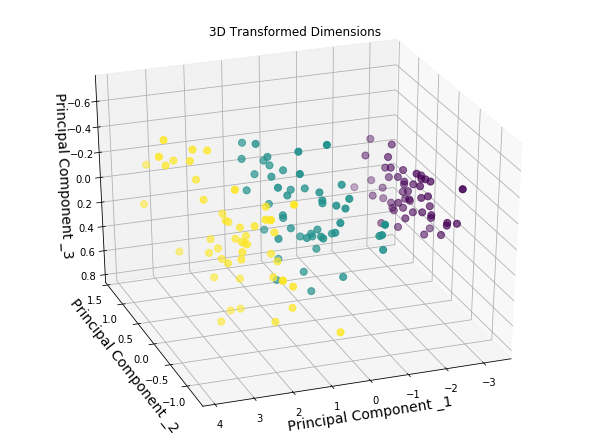

In [10]:
# Creating Principal Component Analysis with 3D representation
pca = decomposition.PCA(n_components=3)
X = pca.fit_transform(x)
Y = df3['target']

# the figure size (using matplotlib)
fig = plt.figure(1, figsize=(8,6))

# matplotlib 3Dimensional
ax = Axes3D(fig, elev=-150,azim=110)


ax.scatter(X[:, 0],X[:, 1],X[:, 2], c=Y, s=50)

ax.set_title("3D Transformed Dimensions")
ax.set_xlabel('Principal Component _1',fontsize=14)
ax.set_ylabel('Principal Component _2',fontsize=14)
ax.set_zlabel('Principal Component _3',fontsize=14)


plt.show()